1.Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.io
import random
import datetime
import time
import sase1d

2.Input parameters

In [2]:
Nruns=1                             # Number of runs
npart   = 512                       # n-macro-particles per bucket 
s_steps = 200#31                        # n-sample points along bunch length
z_steps = 200#20                        # n-sample points along undulator
energy  = 4313.34e6                   # electron energy [eV]
eSpread = 0#1.0e-4                    # relative rms energy spread [ ]
emitN   = 1.2e-6                    # normalized transverse emittance [m-rad]
currentMax = 3900                   # peak current [Ampere]
beta = 26                           # mean beta [meter]
unduPeriod = 0.03                   # undulator period [meter]
unduK = 3.5                         # undulator parameter, K [ ]
unduL = 70#30                          # length of undulator [meter]
radWavelength = 1.5e-9              # seed wavelength? [meter], used only in single-freuqency runs
dEdz = 0                            # rate of relative energy gain or taper [keV/m], optimal~130
iopt = 5                            # 5=SASE, 4=seeded
P0 = 10000*0.0                       # small seed input power [W]
constseed = 1                       # whether we want to use constant random seed for reproducibility, 1 Yes, 0 No

In [3]:
'''
Put input parameters into a inp_struct dict, for 1D FEL run
'''
inp_struct={'Nruns':Nruns,'npart':npart,'s_steps':s_steps,'z_steps':z_steps,'energy':energy,'eSpread':eSpread,\
            'emitN':emitN,'currentMax':currentMax,'beta':beta,'unduPeriod':unduPeriod,'unduK':unduK,'unduL':\
            unduL,'radWavelength':radWavelength,'dEdz':dEdz,'iopt':iopt,'P0':P0,'constseed':constseed}

3.1D FEL run

(200,) (200,)


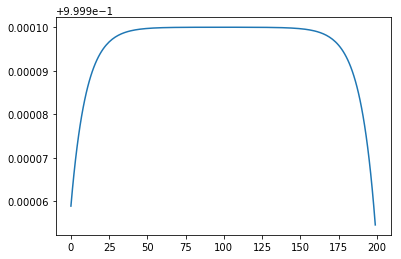

In [4]:
%load_ext autoreload
%autoreload
'''
Use sase function in sase1d.py to run 1D FEL
'''
z,power_z,s,power_s,rho,detune,field,\
field_s,gainLength,resWavelength,\
thet_out,gam_out,bunching,history=sase1d.sase(inp_struct)

4.Print or plot the output

/Users/chrisonian/Code/GitHub/zfel/General_test/sase1d.py:202: RuntimeWarning: divide by zero encountered in log
  plt.plot(z,np.log(power_z))
/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


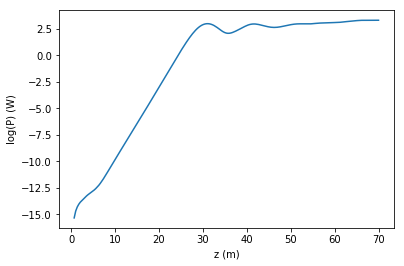

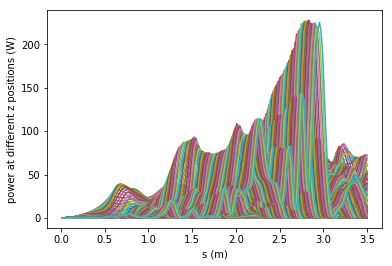

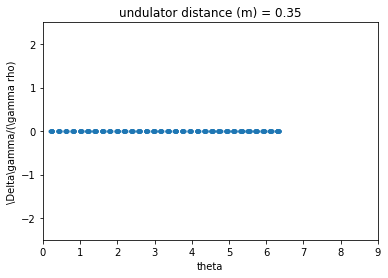

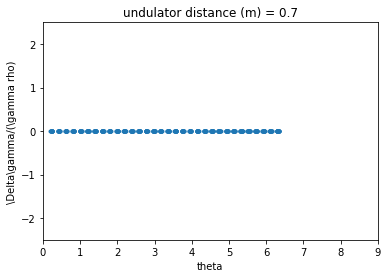

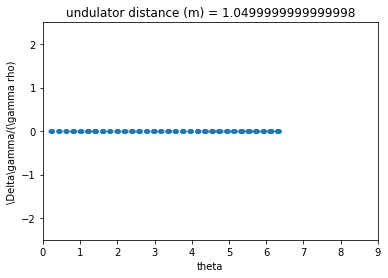

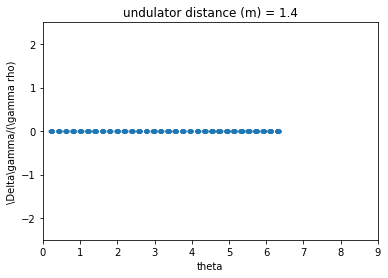

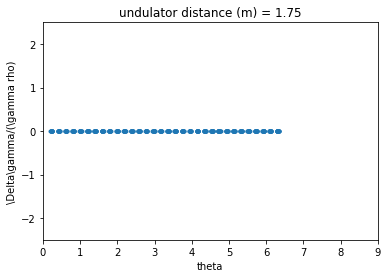

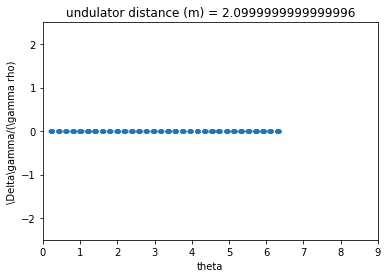

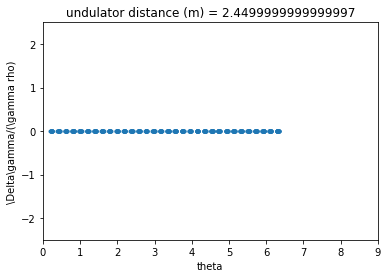

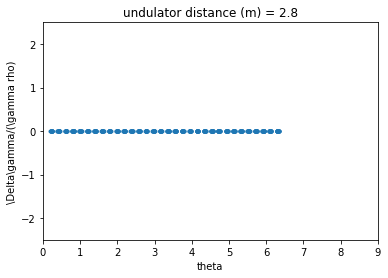

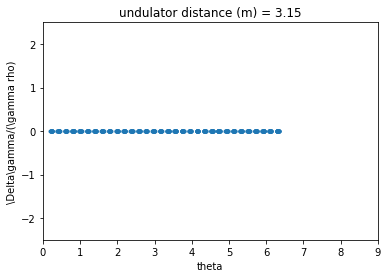

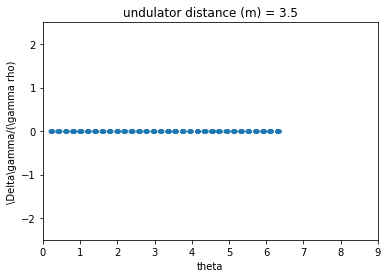

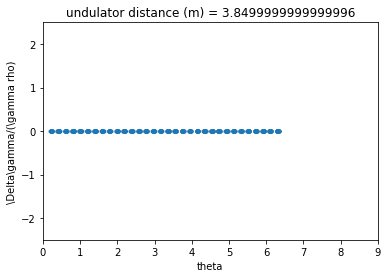

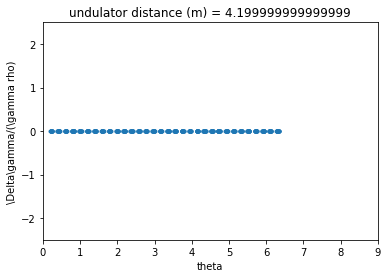

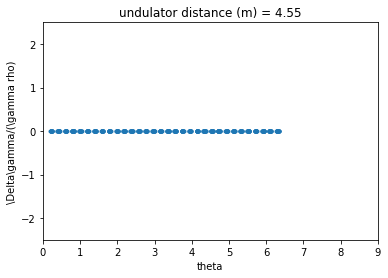

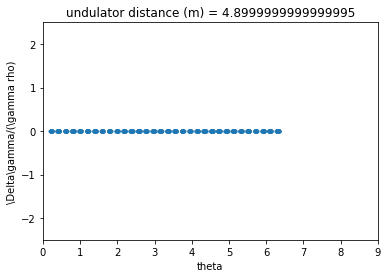

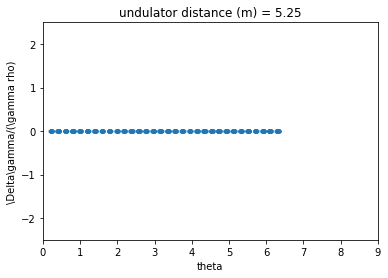

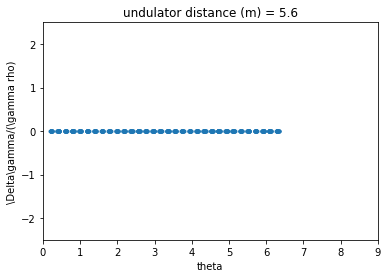

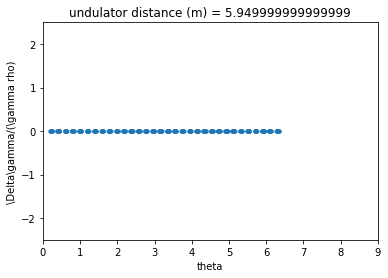

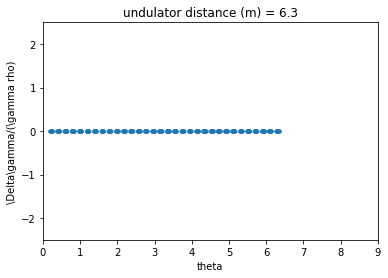

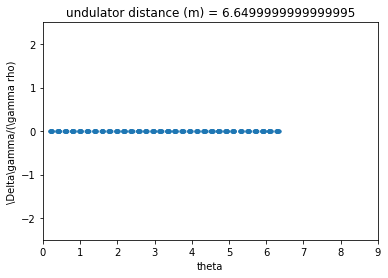

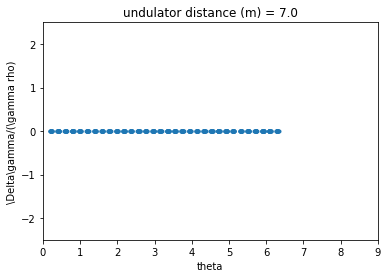

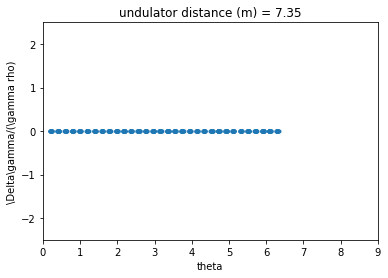

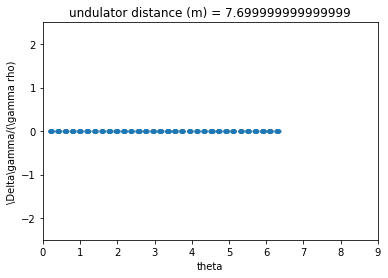

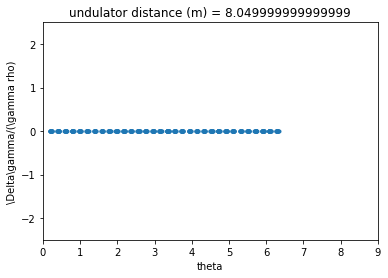

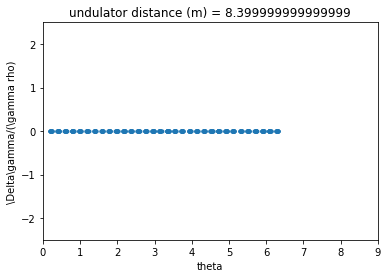

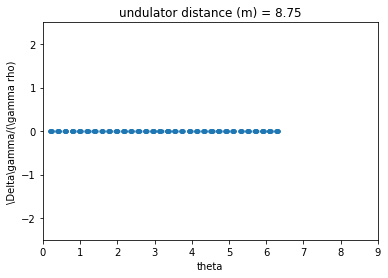

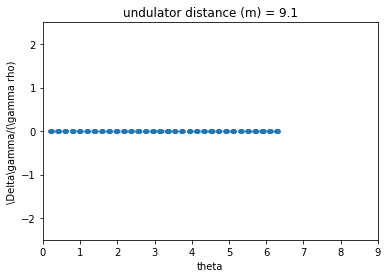

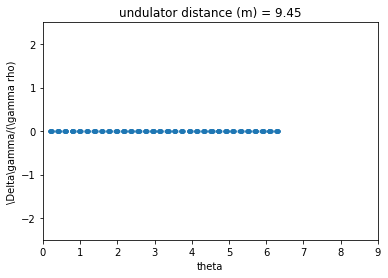

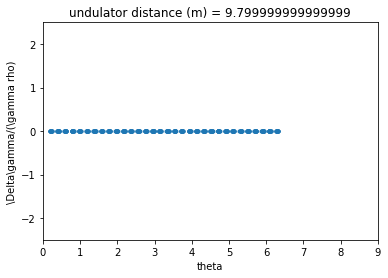

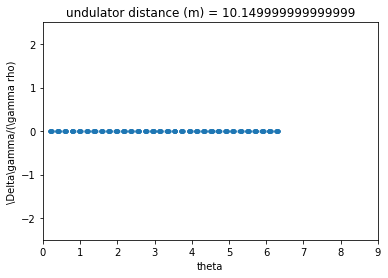

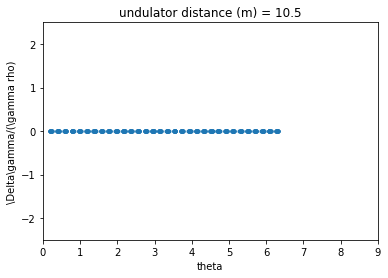

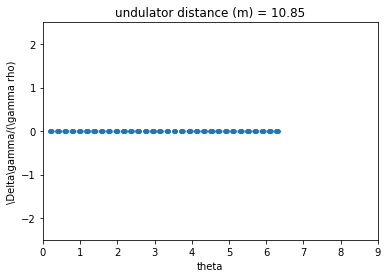

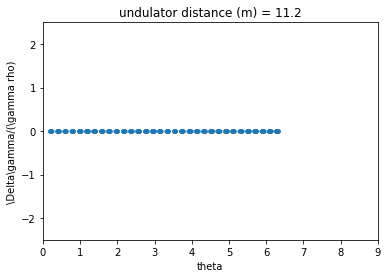

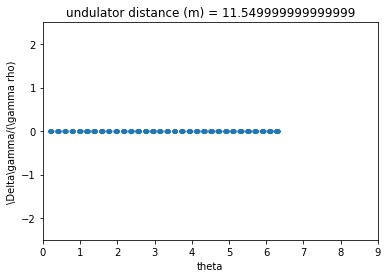

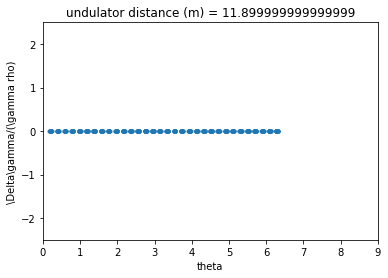

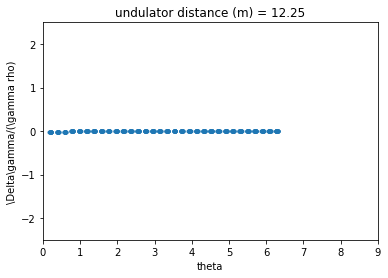

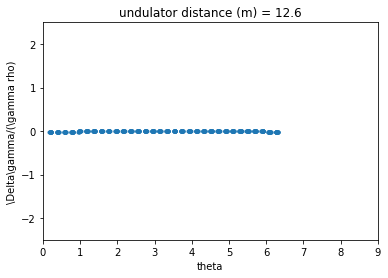

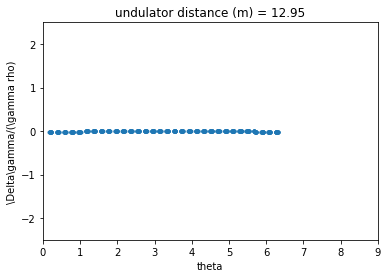

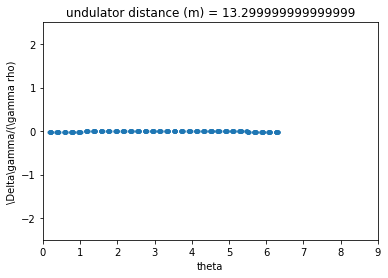

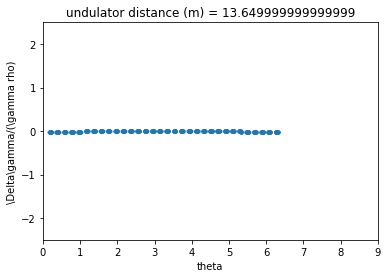

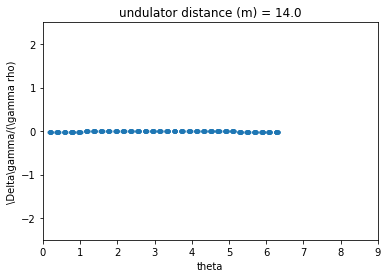

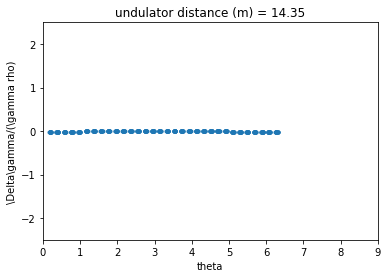

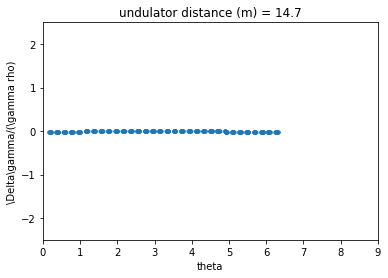

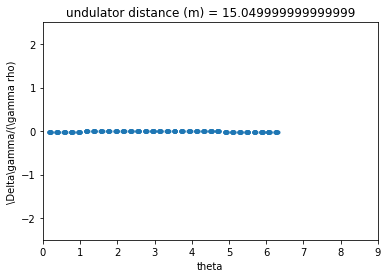

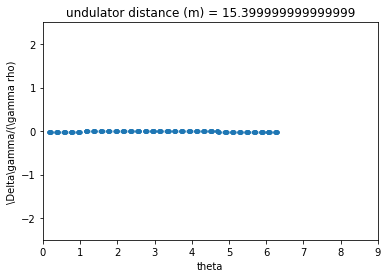

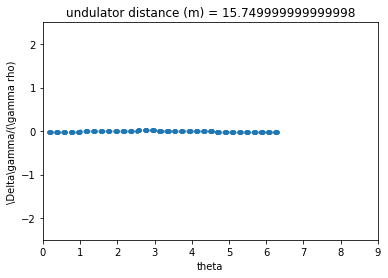

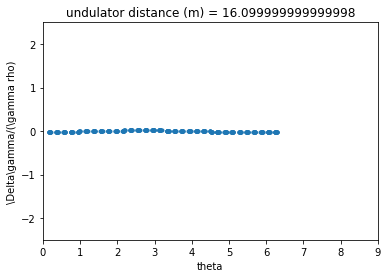

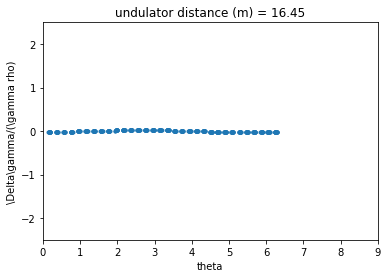

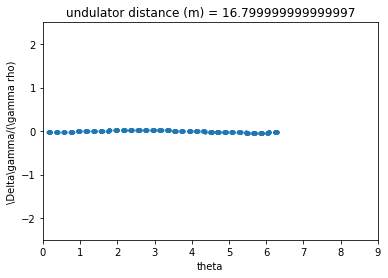

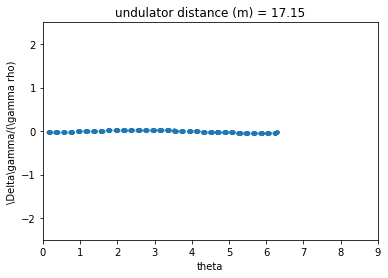

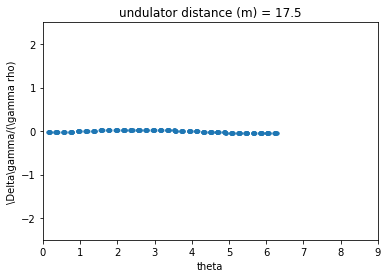

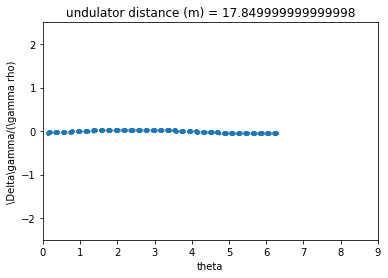

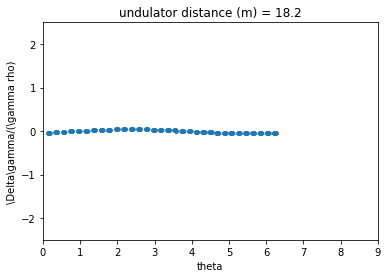

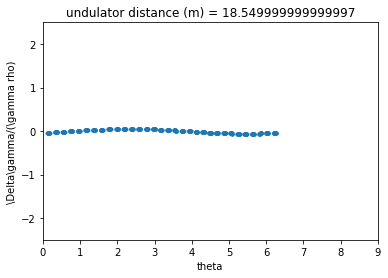

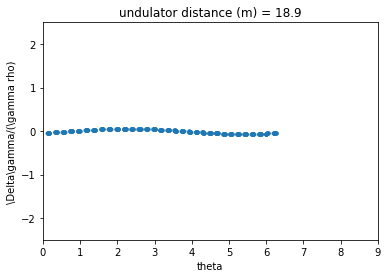

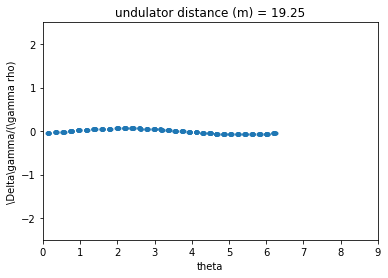

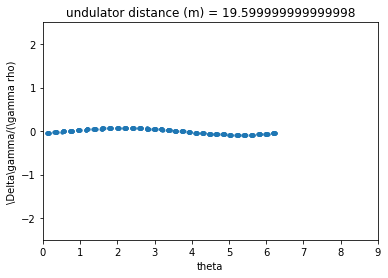

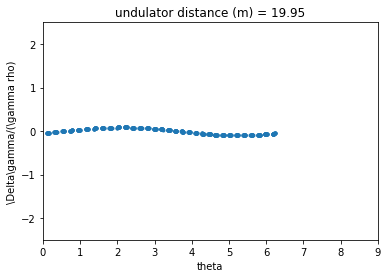

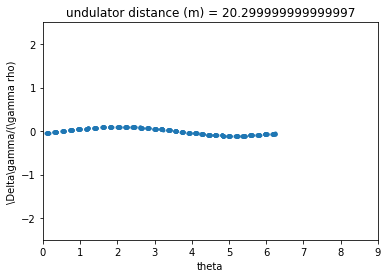

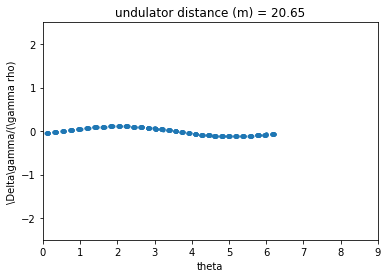

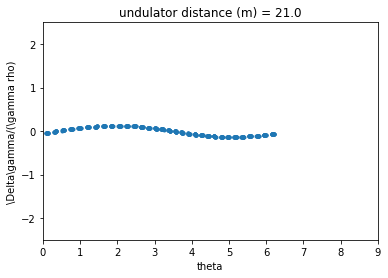

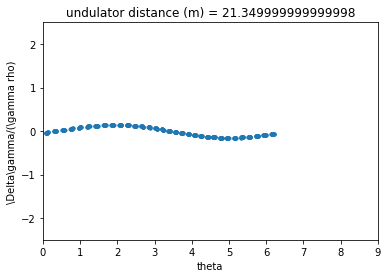

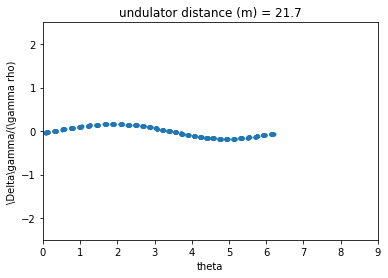

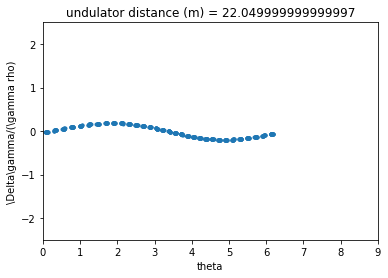

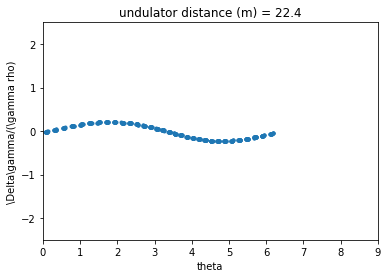

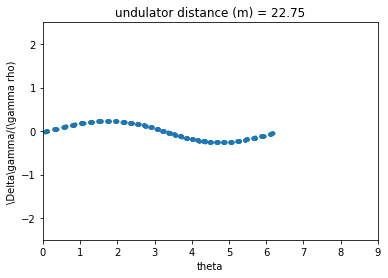

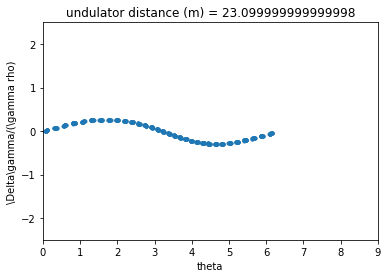

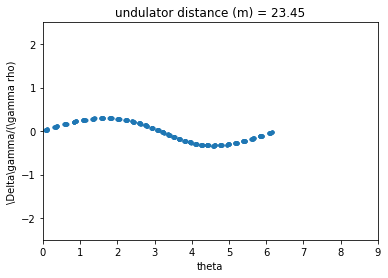

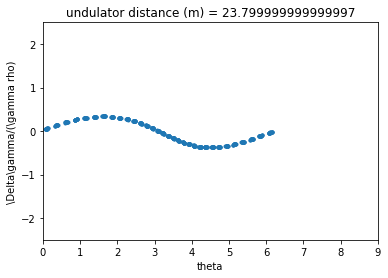

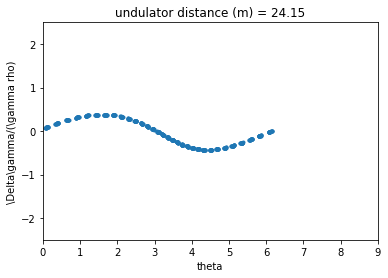

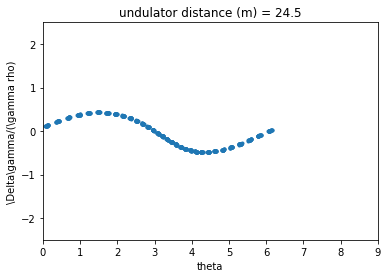

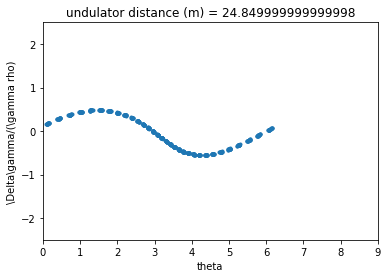

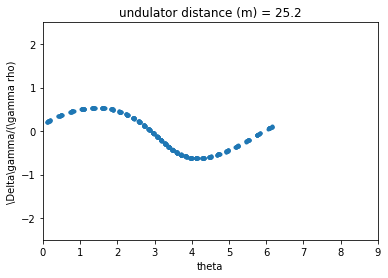

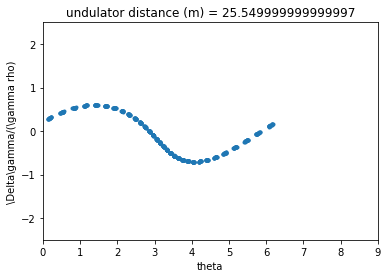

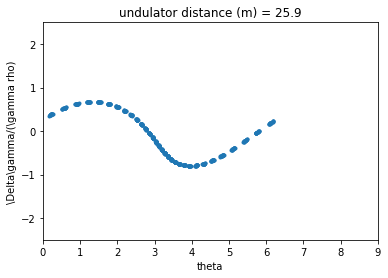

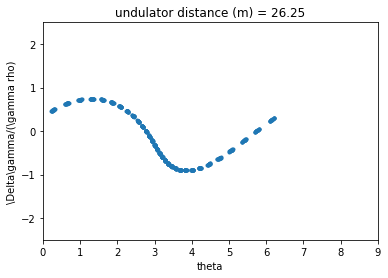

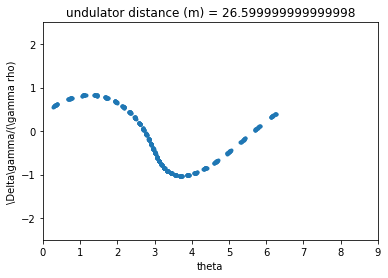

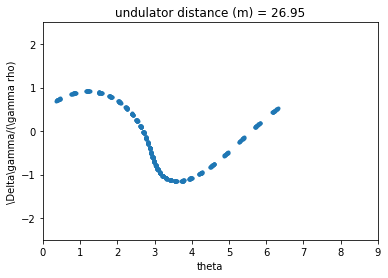

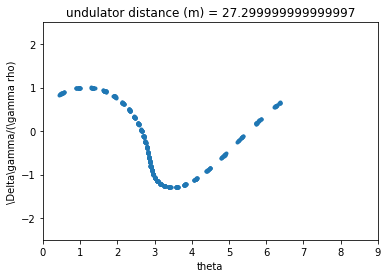

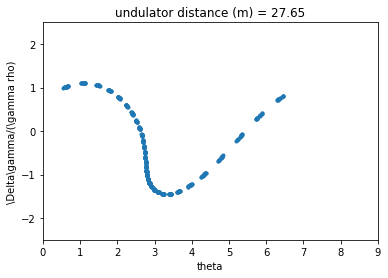

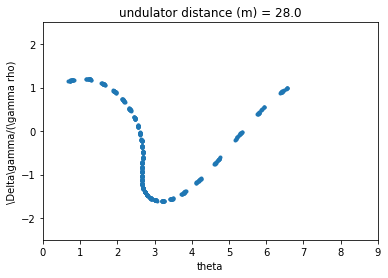

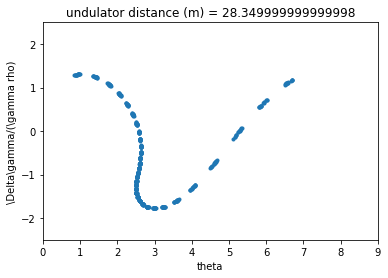

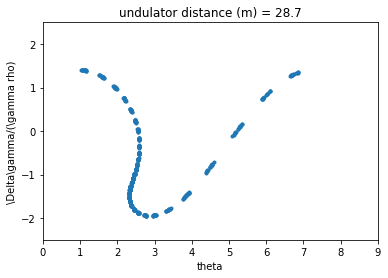

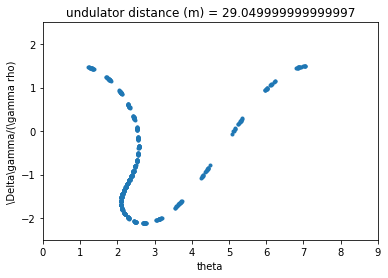

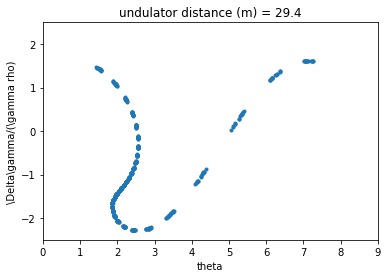

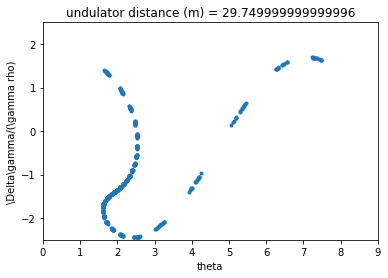

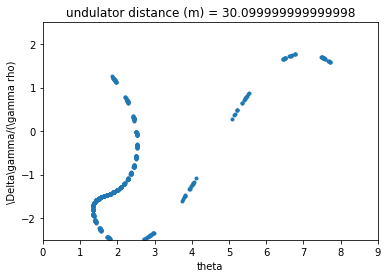

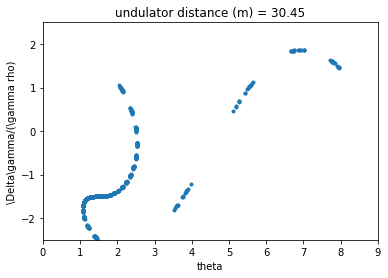

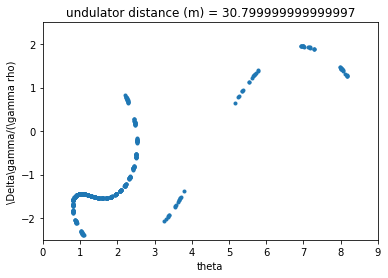

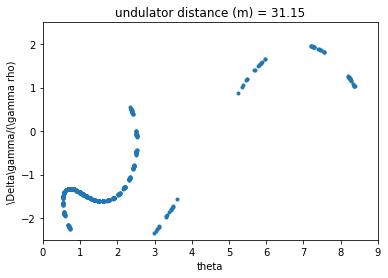

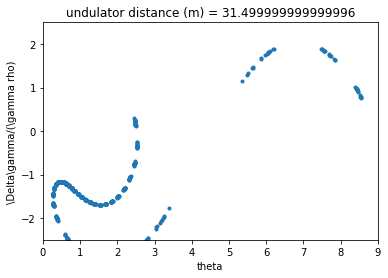

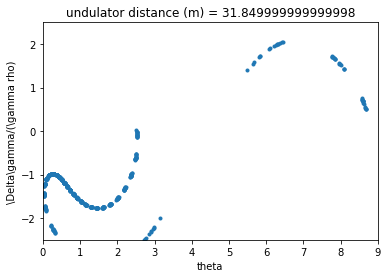

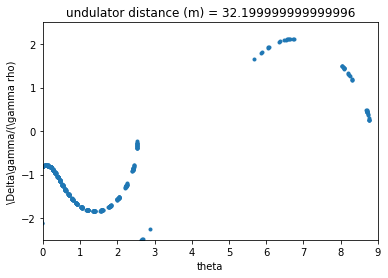

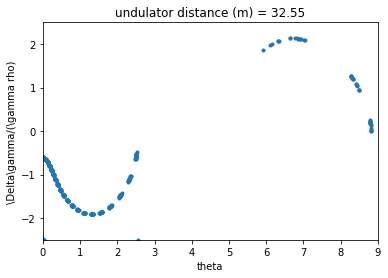

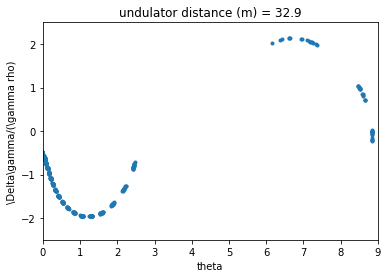

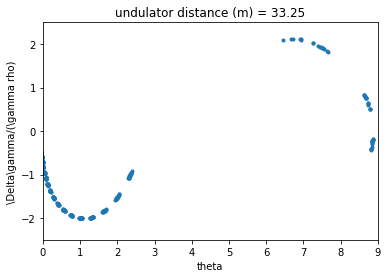

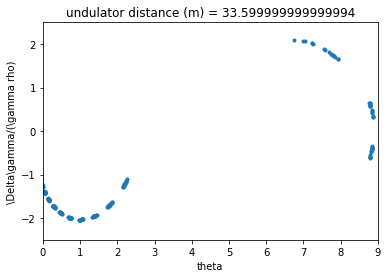

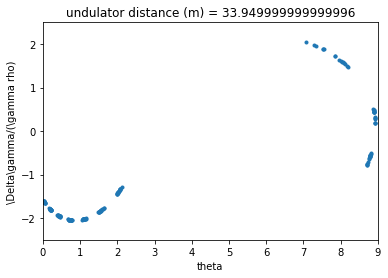

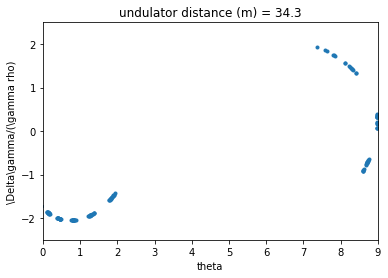

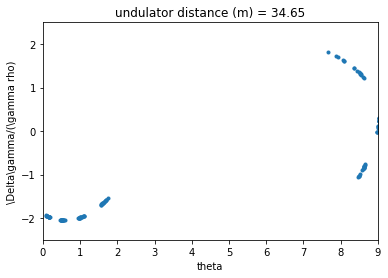

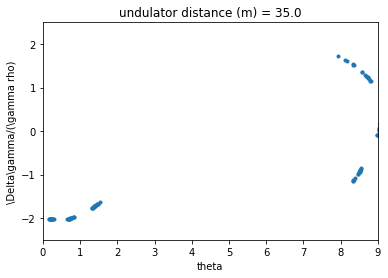

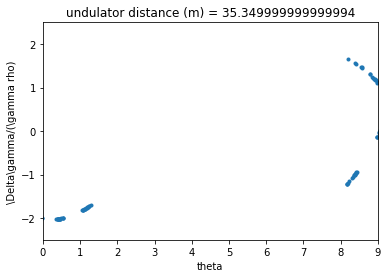

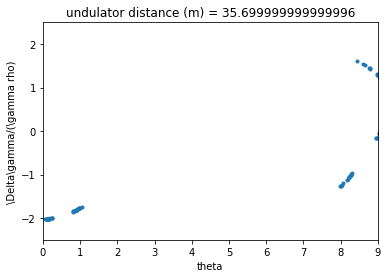

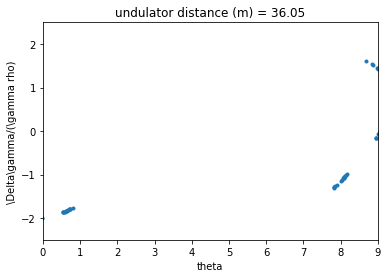

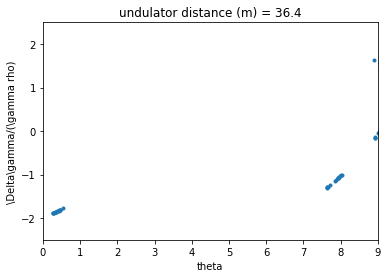

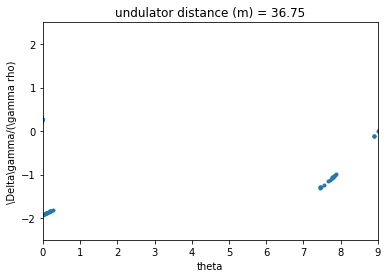

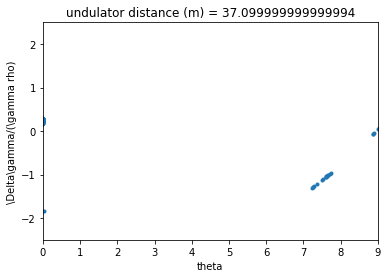

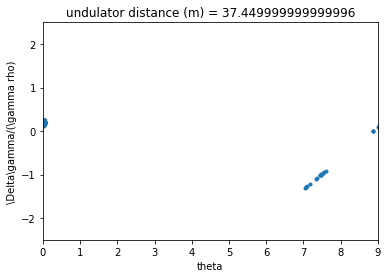

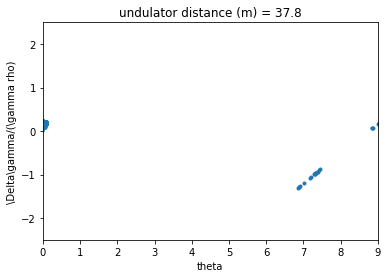

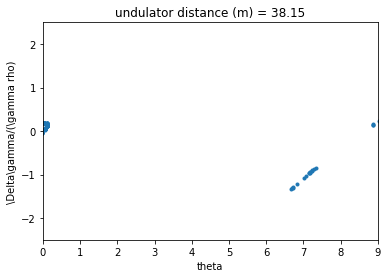

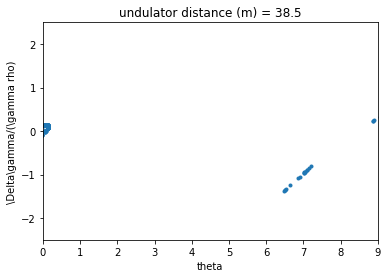

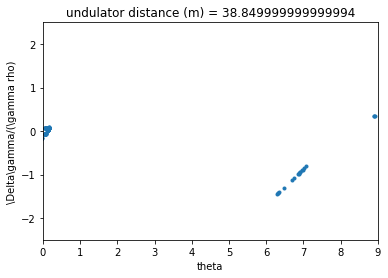

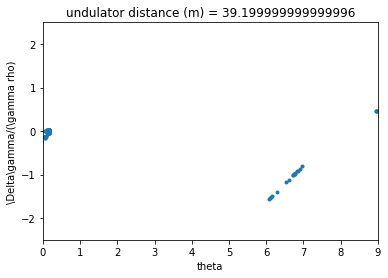

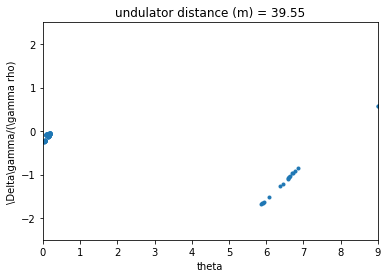

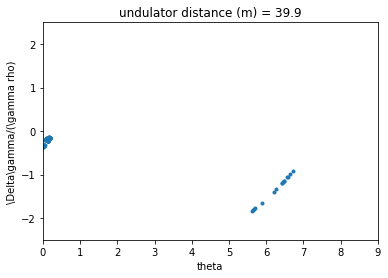

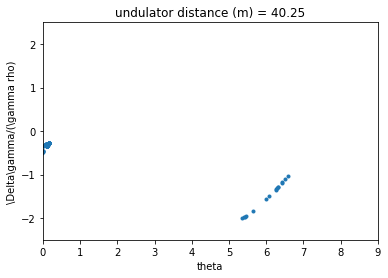

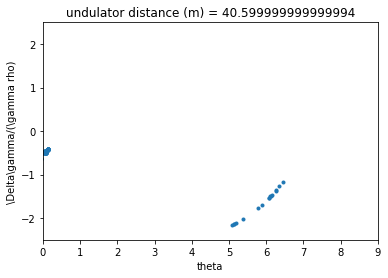

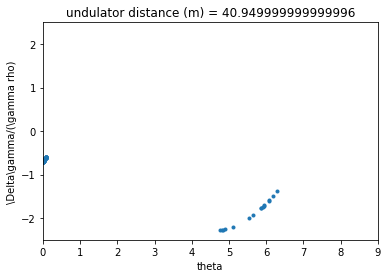

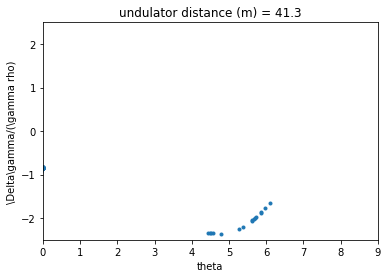

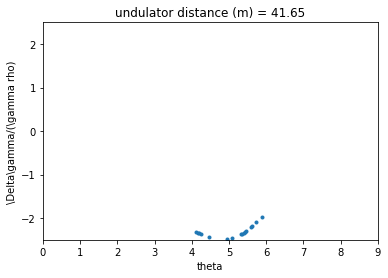

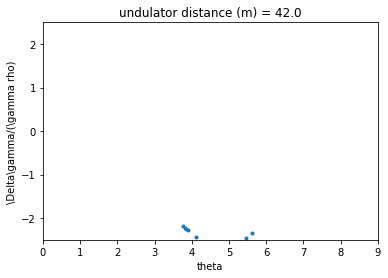

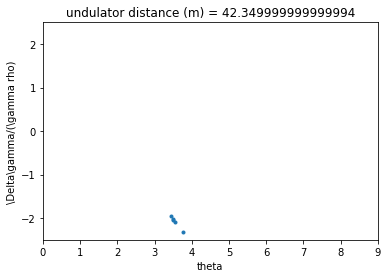

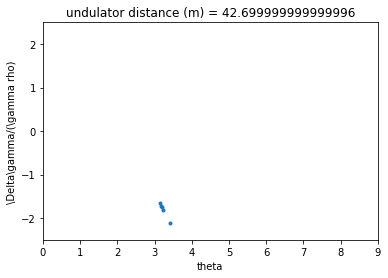

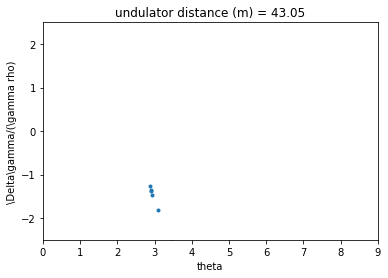

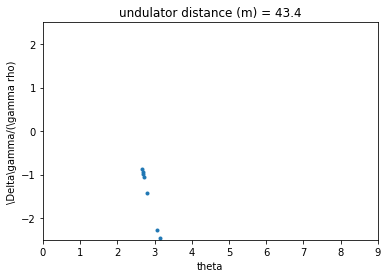

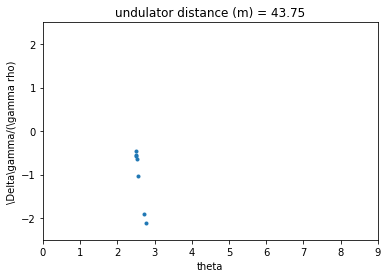

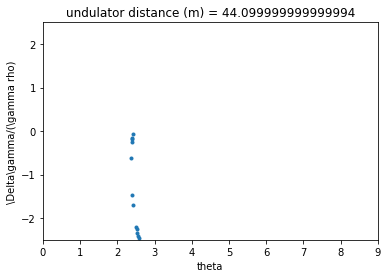

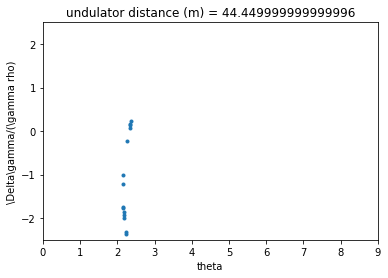

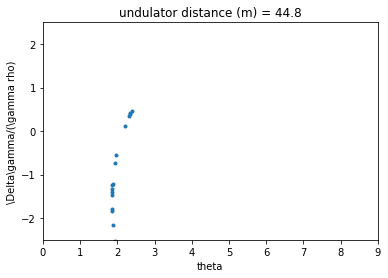

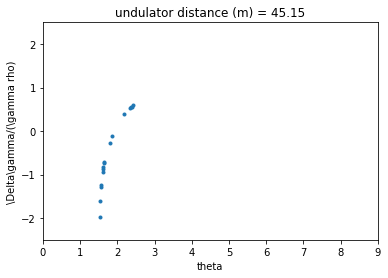

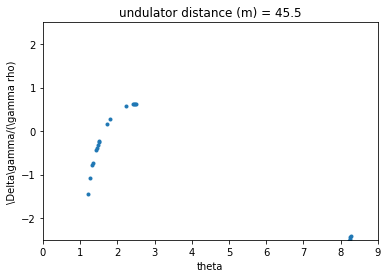

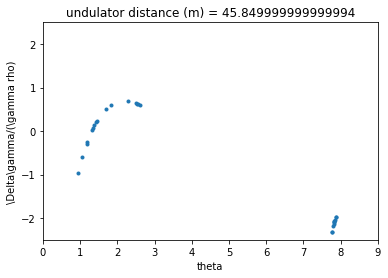

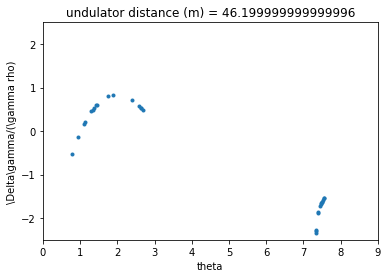

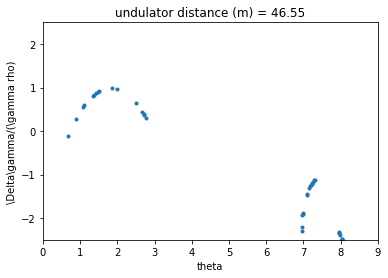

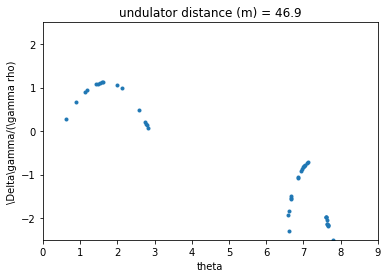

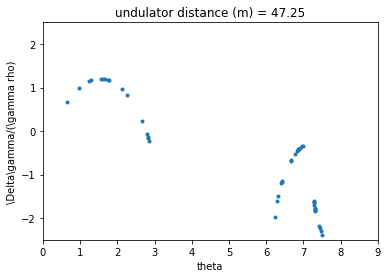

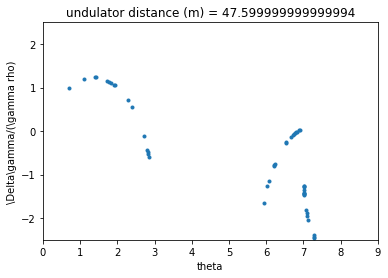

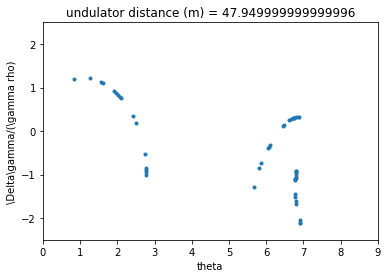

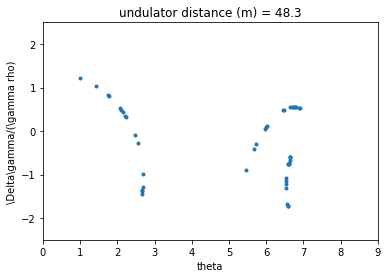

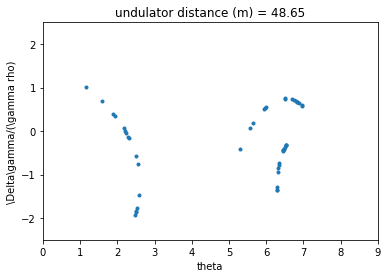

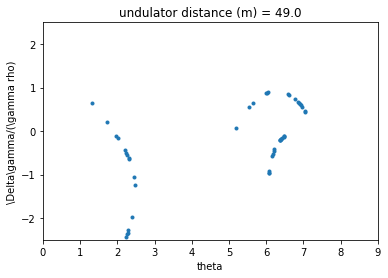

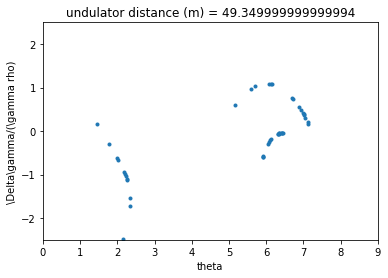

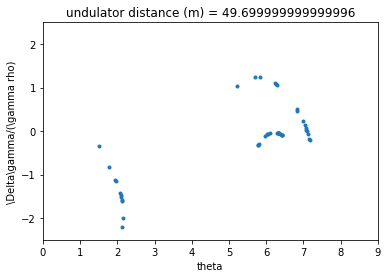

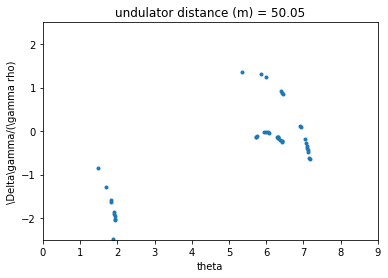

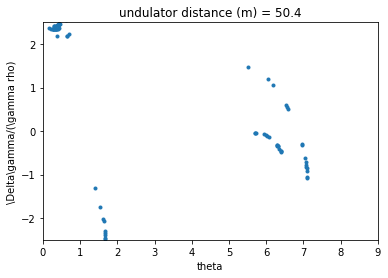

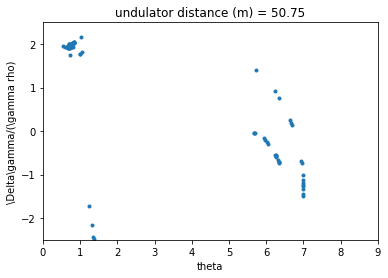

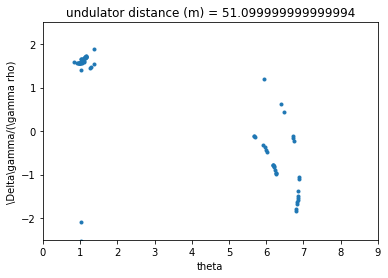

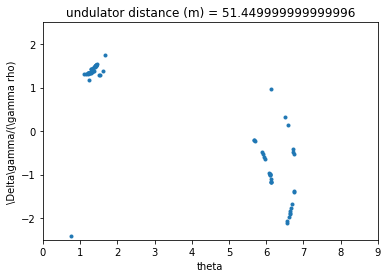

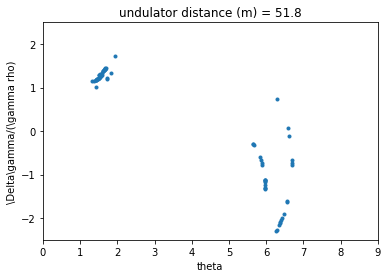

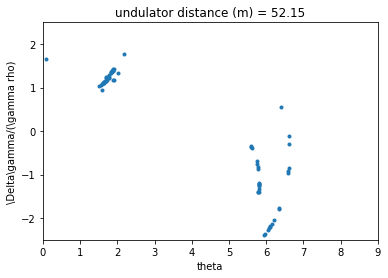

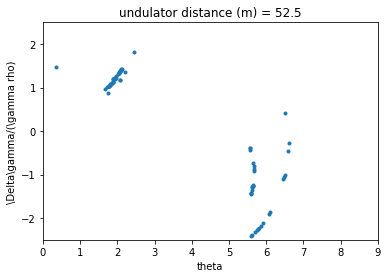

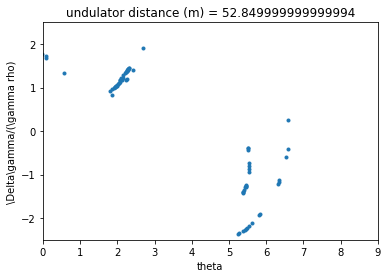

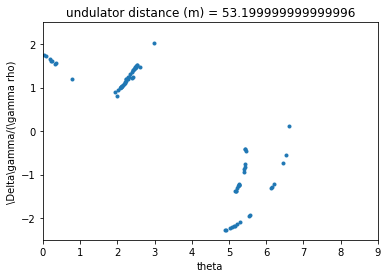

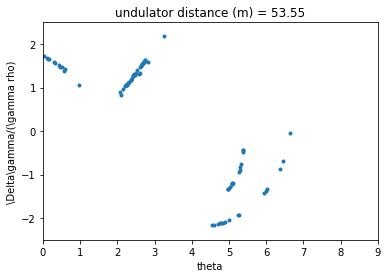

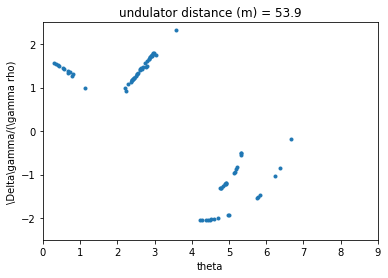

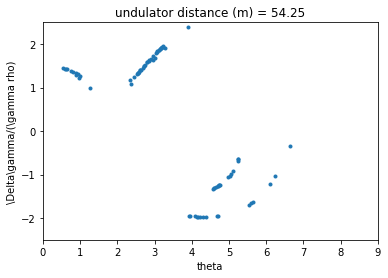

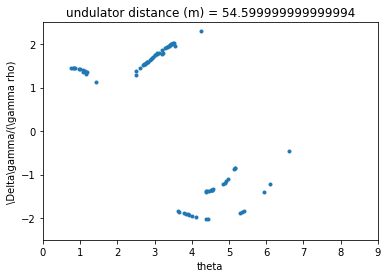

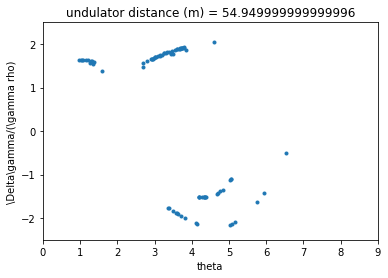

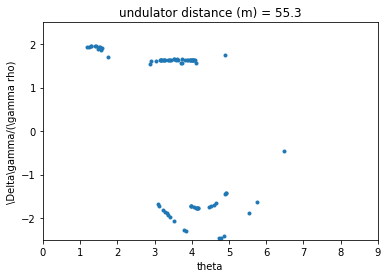

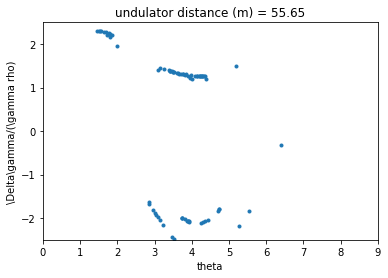

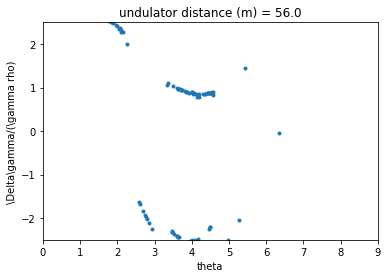

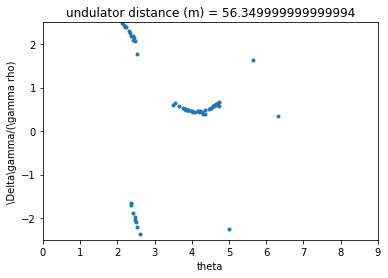

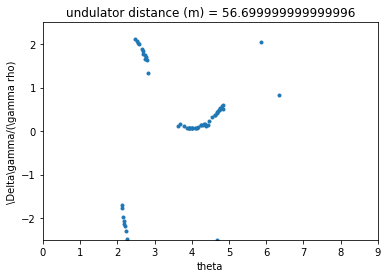

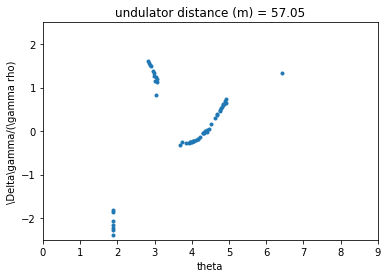

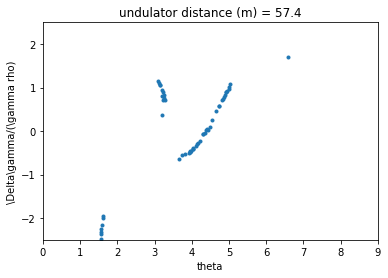

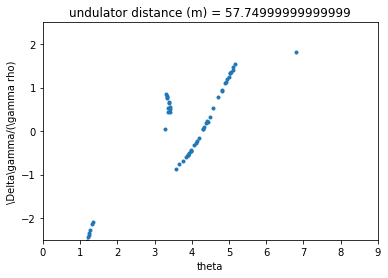

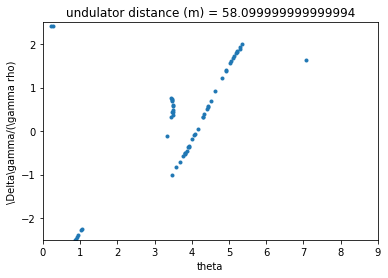

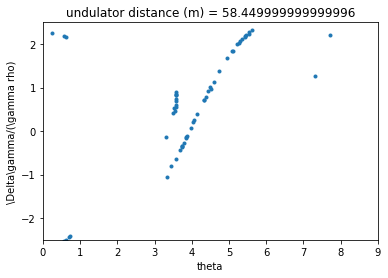

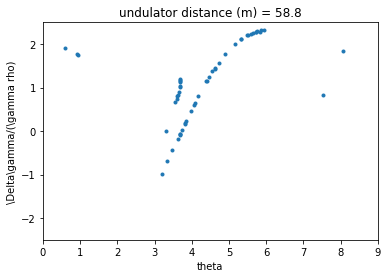

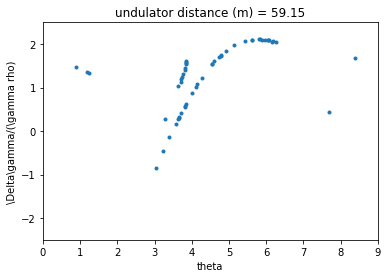

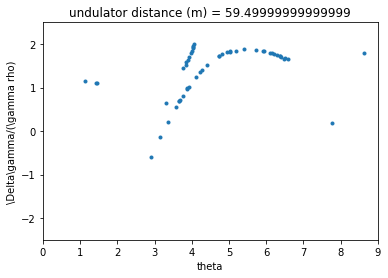

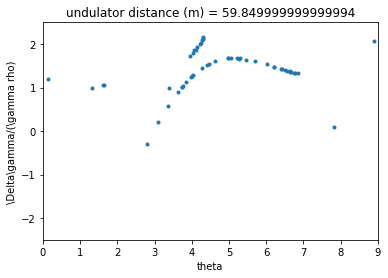

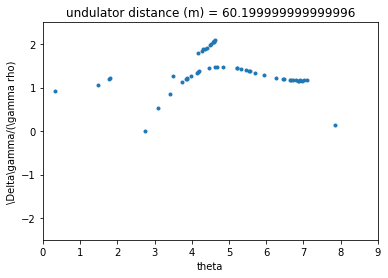

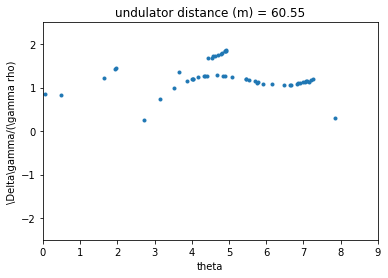

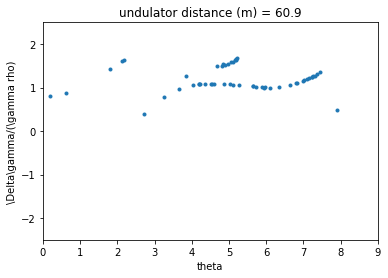

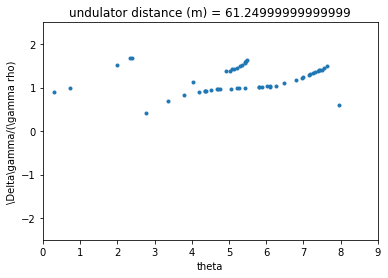

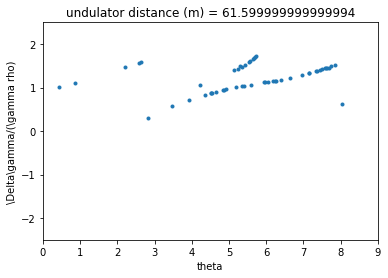

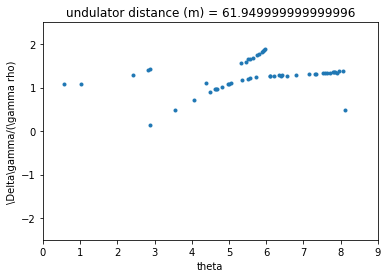

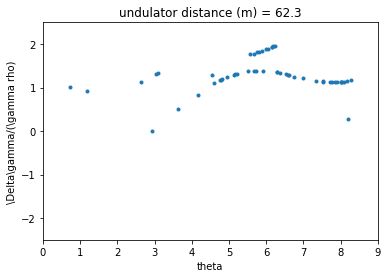

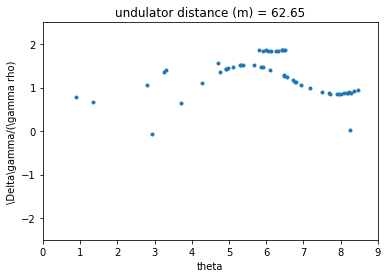

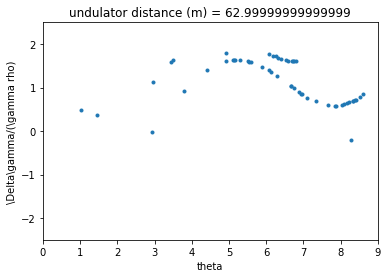

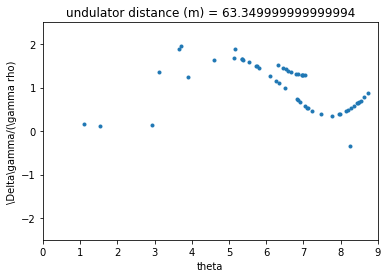

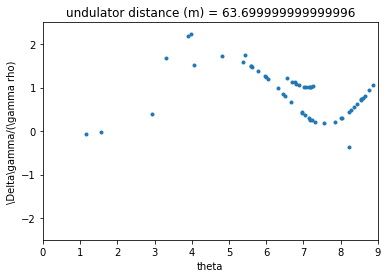

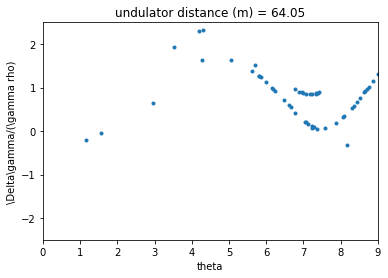

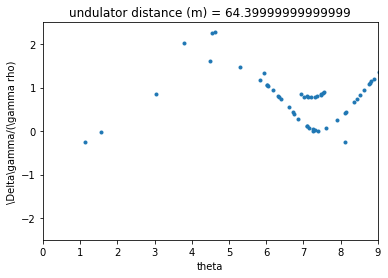

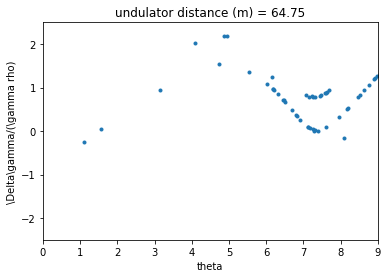

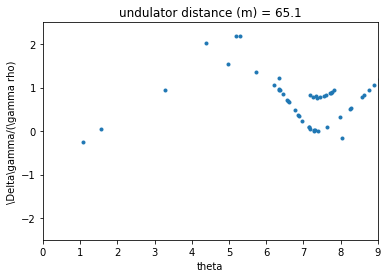

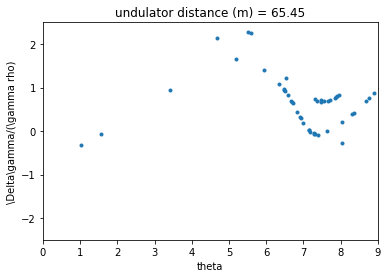

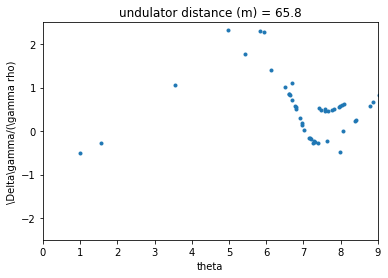

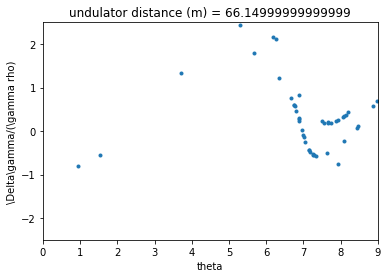

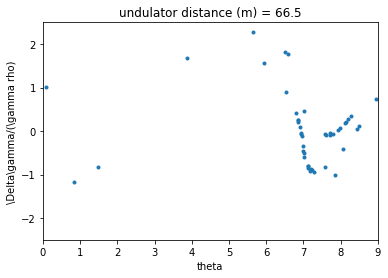

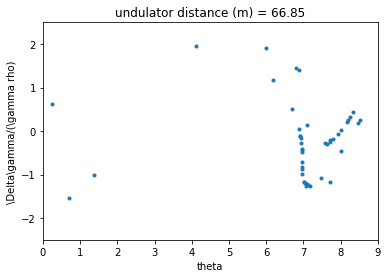

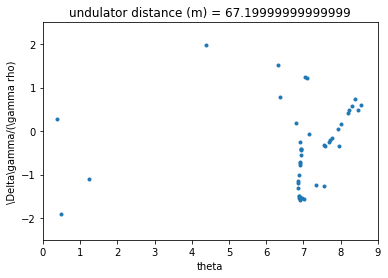

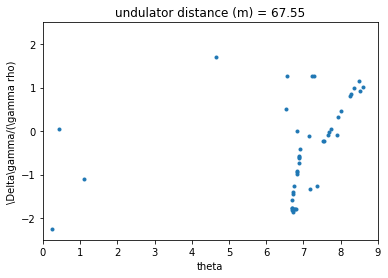

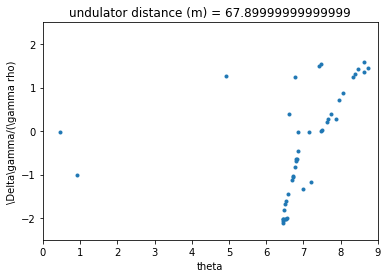

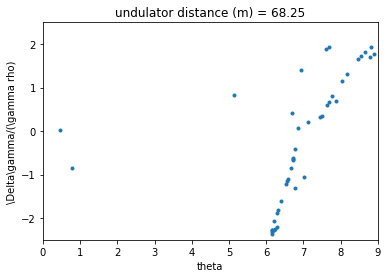

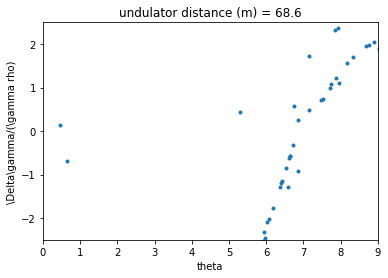

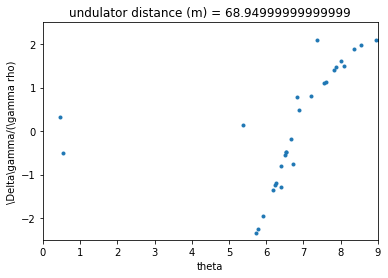

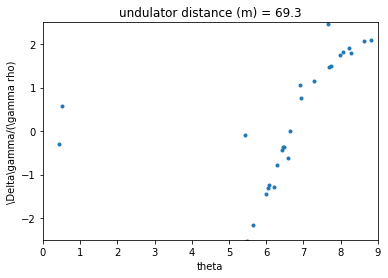

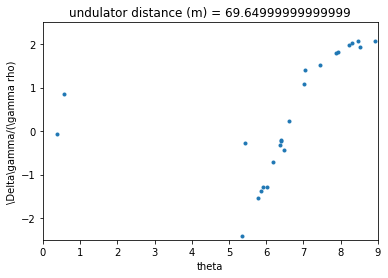

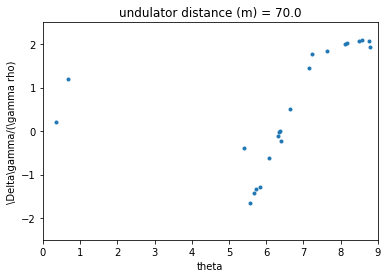

In [5]:
if iopt == 5:
    sase1d.plot_log_power_z(history)
    sase1d.plot_power_s(history)
    sase1d.plot_phase_space(history)
else:
    sase1d.plot_log_power_z(history)
    sase1d.plot_phase_space(history)

In [6]:
print(rho)
print(detune)
print(gainLength)
print(resWavelength)
print(thet_out,gam_out)

0.0009984555210126444
[-8.97597901 -8.88621922 -8.79645943 -8.70669964 -8.61693985 -8.52718006
 -8.43742027 -8.34766048 -8.25790069 -8.1681409  -8.07838111 -7.98862132
 -7.89886153 -7.80910174 -7.71934195 -7.62958216 -7.53982237 -7.45006258
 -7.36030279 -7.270543   -7.18078321 -7.09102342 -7.00126363 -6.91150384
 -6.82174405 -6.73198426 -6.64222447 -6.55246468 -6.46270489 -6.3729451
 -6.28318531 -6.19342552 -6.10366573 -6.01390594 -5.92414615 -5.83438636
 -5.74462657 -5.65486678 -5.56510699 -5.4753472  -5.38558741 -5.29582762
 -5.20606783 -5.11630804 -5.02654825 -4.93678846 -4.84702867 -4.75726888
 -4.66750909 -4.5777493  -4.48798951 -4.39822972 -4.30846992 -4.21871013
 -4.12895034 -4.03919055 -3.94943076 -3.85967097 -3.76991118 -3.68015139
 -3.5903916  -3.50063181 -3.41087202 -3.32111223 -3.23135244 -3.14159265
 -3.05183286 -2.96207307 -2.87231328 -2.78255349 -2.6927937  -2.60303391
 -2.51327412 -2.42351433 -2.33375454 -2.24399475 -2.15423496 -2.06447517
 -1.97471538 -1.88495559 -1.79

In [9]:
print(z)
print(power_z)
print(s)
print(power_s)
print(field)
print(field_s)
print(bunching)

[ 0.35  0.7   1.05  1.4   1.75  2.1   2.45  2.8   3.15  3.5   3.85  4.2
  4.55  4.9   5.25  5.6   5.95  6.3   6.65  7.    7.35  7.7   8.05  8.4
  8.75  9.1   9.45  9.8  10.15 10.5  10.85 11.2  11.55 11.9  12.25 12.6
 12.95 13.3  13.65 14.   14.35 14.7  15.05 15.4  15.75 16.1  16.45 16.8
 17.15 17.5  17.85 18.2  18.55 18.9  19.25 19.6  19.95 20.3  20.65 21.
 21.35 21.7  22.05 22.4  22.75 23.1  23.45 23.8  24.15 24.5  24.85 25.2
 25.55 25.9  26.25 26.6  26.95 27.3  27.65 28.   28.35 28.7  29.05 29.4
 29.75 30.1  30.45 30.8  31.15 31.5  31.85 32.2  32.55 32.9  33.25 33.6
 33.95 34.3  34.65 35.   35.35 35.7  36.05 36.4  36.75 37.1  37.45 37.8
 38.15 38.5  38.85 39.2  39.55 39.9  40.25 40.6  40.95 41.3  41.65 42.
 42.35 42.7  43.05 43.4  43.75 44.1  44.45 44.8  45.15 45.5  45.85 46.2
 46.55 46.9  47.25 47.6  47.95 48.3  48.65 49.   49.35 49.7  50.05 50.4
 50.75 51.1  51.45 51.8  52.15 52.5  52.85 53.2  53.55 53.9  54.25 54.6
 54.95 55.3  55.65 56.   56.35 56.7  57.05 57.4  57.75 58.1  58.45